## CAMELPHAT

In [6]:
import pandas as pd

career_performance_df = pd.read_csv('CamelPhat-Analytics-Career Performance.csv')


career_performance_df.head()


,Date,Viberate performance points,Viberate rank
0,2023-02-27,599598,NaN
1,2023-02-28,600835,3340.0
2,2023-03-01,602380,3353.0
3,2023-03-02,602931,3390.0
4,2023-03-03,602866,3387.0


For the Career Performance Analysis, we'll focus on CamelPhat's performance trends over time, comparing various performance metrics such as streams, downloads, and possibly other metrics included in the dataset you've provided. Let's start by loading and examining the "Career Performance" data to understand its structure and what specific analyses we can perform.

The "Career Performance" dataset includes the following columns:

    Date: The specific dates of recorded data.
    Viberate performance points: A numerical score indicating CamelPhat's performance, possibly aggregating various metrics like streams, social media engagement, etc.
    Viberate rank: Their rank among artists, which can provide insight into their competitive position in the industry.

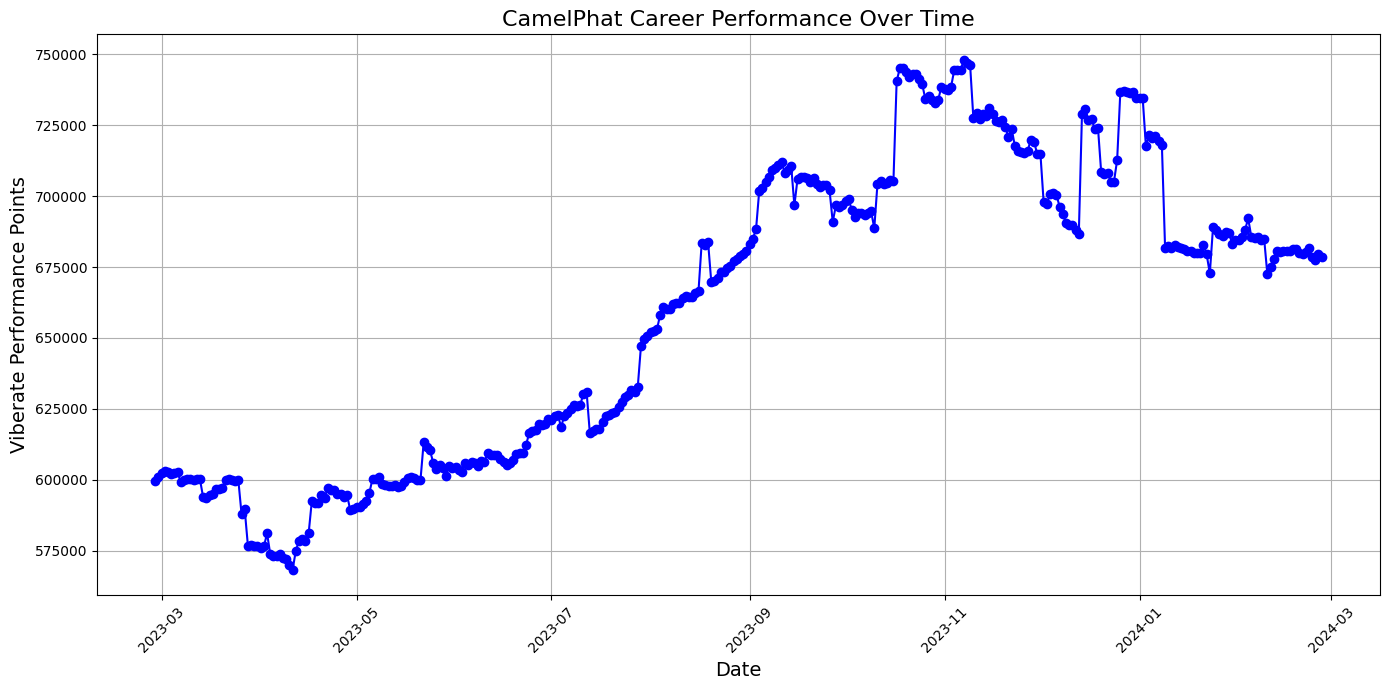

In [5]:
import matplotlib.pyplot as plt

career_performance_df['Date'] = pd.to_datetime(career_performance_df['Date'])

plt.figure(figsize=(14, 7))
plt.plot(career_performance_df['Date'], career_performance_df['Viberate performance points'], marker='o', linestyle='-', color='blue')
plt.title('CamelPhat Career Performance Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Viberate Performance Points', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The trend analysis of CamelPhat's Viberate performance points over time shows how their career performance has evolved. The plot illustrates trends, fluctuations, and possibly significant changes in performance

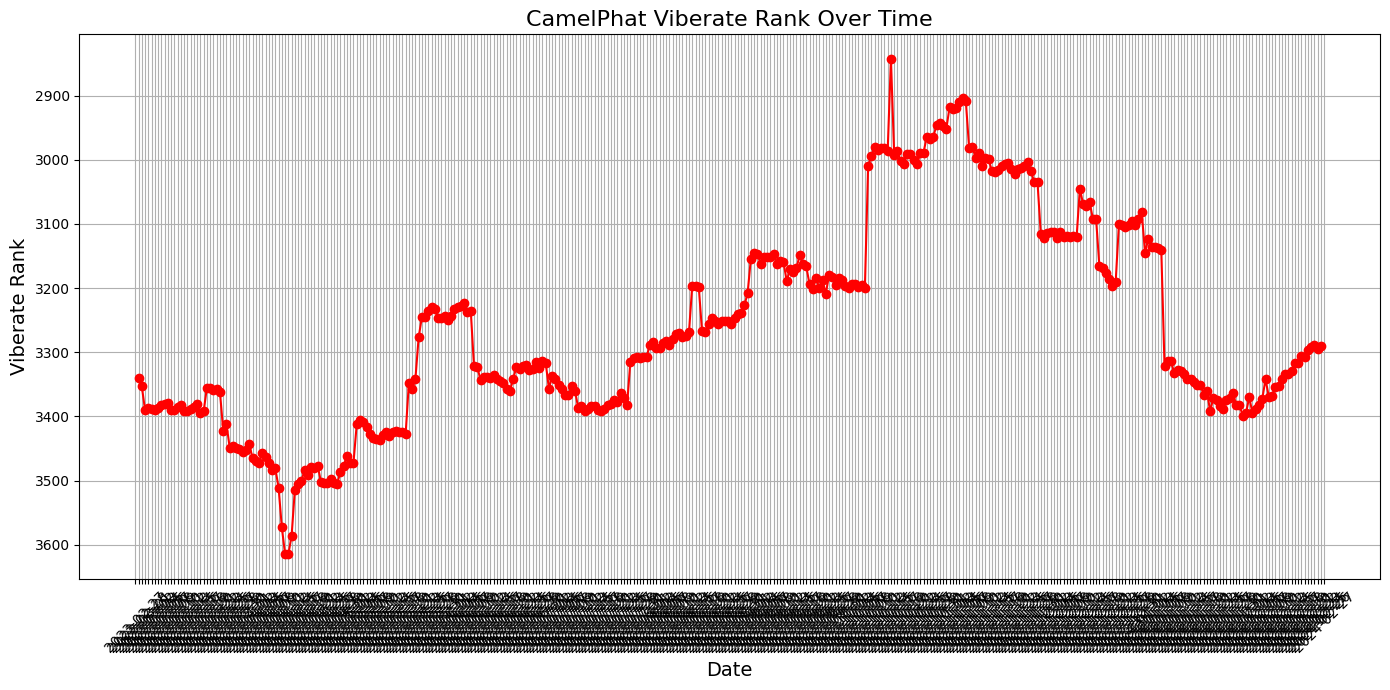

In [14]:
# Check for non-null values in the 'Viberate rank' column to ensure we have enough data for analysis
rank_non_null_count = career_performance_df['Viberate rank'].notnull().sum()

# If we have a substantial amount of non-null data, we'll proceed with the plot
if rank_non_null_count > 0:
    # Plotting the Viberate rank over time
    plt.figure(figsize=(14, 7))
    plt.plot(career_performance_df['Date'], career_performance_df['Viberate rank'], marker='o', linestyle='-', color='red')
    plt.title('CamelPhat Viberate Rank Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Viberate Rank', fontsize=14)
    plt.gca().invert_yaxis() # Inverting y-axis as a lower rank is better
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




The analysis of CamelPhat's Viberate rank over time is displayed in the plot, showing how their industry standing has evolved. The y-axis is inverted, so a lower rank (closer to 1) indicates a better position in the industry. This visualization helps to understand trends in their ranking, including any improvements or declines over the observed period.

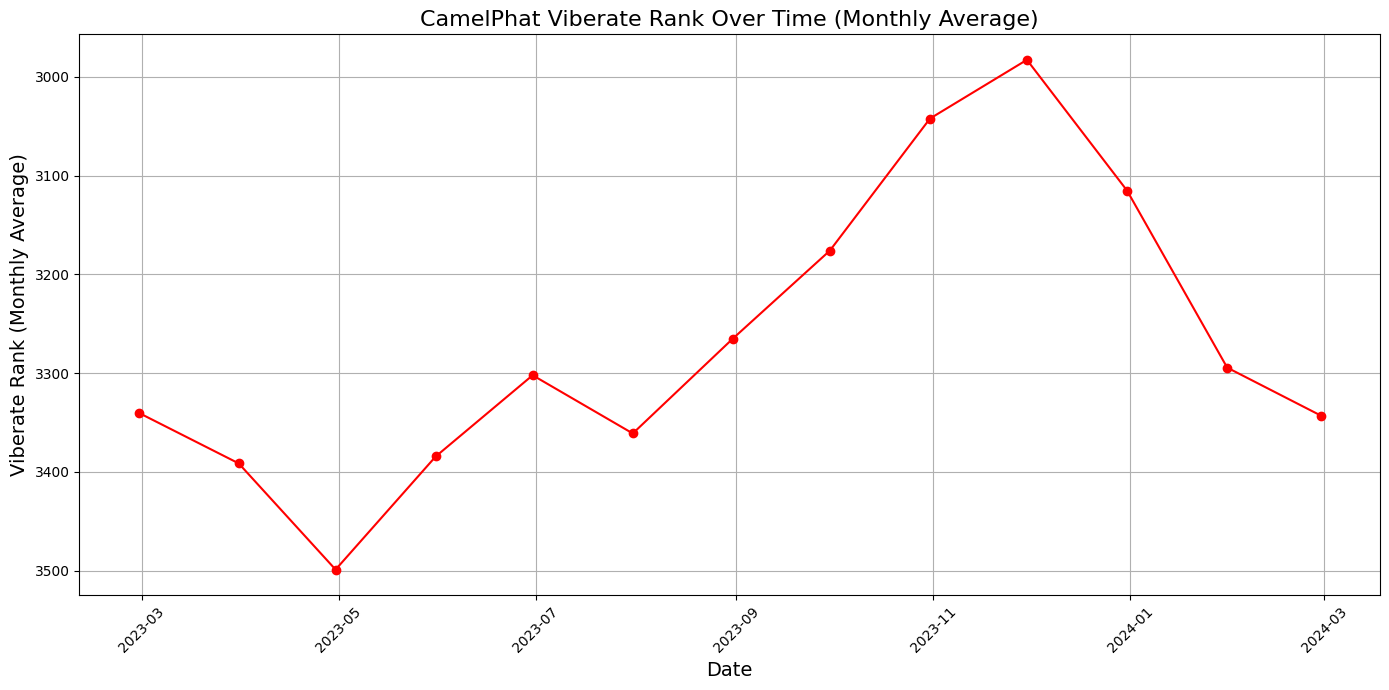

In [15]:
# Ensure the 'Date' column is in datetime format and set it as the index
career_performance_df['Date'] = pd.to_datetime(career_performance_df['Date'])
career_performance_df.set_index('Date', inplace=True)

# Now that 'Date' is the index, resample the data monthly and calculate the mean rank
monthly_rank_corrected = career_performance_df['Viberate rank'].resample('M').mean()

# Plotting the corrected monthly averaged Viberate rank over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_rank_corrected.index, monthly_rank_corrected, marker='o', linestyle='-', color='red')
plt.title('CamelPhat Viberate Rank Over Time (Monthly Average)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Viberate Rank (Monthly Average)', fontsize=14)
plt.gca().invert_yaxis()  # Inverting y-axis as a lower rank is better
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



This revised plot shows CamelPhat's Viberate rank over time, aggregated on a monthly basis to highlight broader trends and changes in their industry standing more clearly. By smoothing the data in this way, it's easier to discern periods of significant improvement or decline in their rank.

In [16]:
# Calculating the correlation between 'Viberate performance points' and 'Viberate rank'
correlation = career_performance_df[['Viberate performance points', 'Viberate rank']].corr()

correlation


,Viberate performance points,Viberate rank
Viberate performance points,1.000000,-0.849019
Viberate rank,-0.849019,1.000000


The correlation analysis between Viberate performance points and Viberate rank shows a strong negative correlation of approximately -0.85. This indicates that higher performance points are indeed associated with a better (lower) rank, as expected. The negative sign reflects the inverse relationship: as performance points increase, the rank number decreases (improves

## Engagement Analysis

For the Engagement Analysis, we'll look into CamelPhat's engagement trends over time, including metrics like likes, shares, comments, or any other engagement indicators provided in the dataset. This can help us understand how actively involved CamelPhat's audience is with their content. Let's start by loading and examining the "Engagement" data to get a sense of its structure and the specific analyses we can perform.

The "Engagement" dataset contains the following columns:

    Date: The dates for the engagement data records.
    Spotify streams: The number of streams on Spotify.
    Youtube views: The number of views on Youtube.
    Instagram post likes: The number of likes on Instagram posts.
    Shazams: The number of times tracks have been identified on Shazam.
    Airplay spins: The number of times tracks have been played on air.
    X likes: This could represent likes on an unspecified platform, possibly another social media or music platform.
    Soundcloud plays: The number of plays on Soundcloud.
    Tiktok likes: The number of likes on Tiktok.

With this data, we can conduct a comprehensive engagement analysis, looking into trends across different platforms and understanding how engagement metrics have evolved over time.

In [18]:
# Load the Engagement dataset
engagement_df = pd.read_csv('CamelPhat-Analytics-Engagement.csv')

# Display the first few rows of the dataframe to understand its structure
engagement_df.head()


,Date,Spotify streams,Youtube views,Instagram post likes,Shazams,Airplay spins,X likes,Soundcloud plays,Tiktok likes
0,2023-03-06,3396634,1212480,15000,20903,653,3576,29614,0
1,2023-03-13,3824535,1075118,8250,55398,791,3956,47536,0
2,2023-03-20,3728532,1425908,6750,49126,832,1814,48280,0
3,2023-03-27,3679830,1209586,5375,41997,861,2408,47921,0
4,2023-04-03,4049282,1213474,16625,39061,808,3571,48019,0


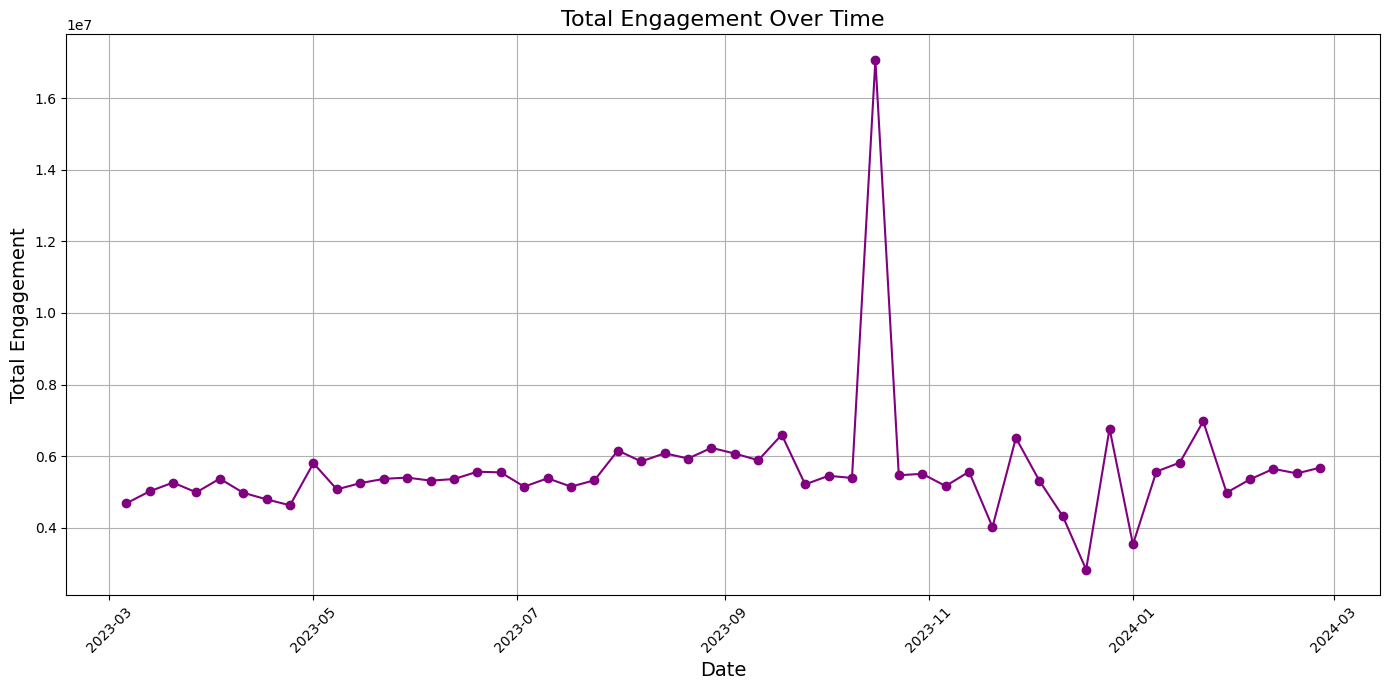

In [19]:
# Adding a new column for total engagement by summing all engagement metrics for each row
engagement_df['Total Engagement'] = engagement_df.drop('Date', axis=1).sum(axis=1)

# Convert 'Date' column to datetime format for better plotting
engagement_df['Date'] = pd.to_datetime(engagement_df['Date'])

# Plotting the total engagement over time
plt.figure(figsize=(14, 7))
plt.plot(engagement_df['Date'], engagement_df['Total Engagement'], marker='o', linestyle='-', color='purple')
plt.title('Total Engagement Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Engagement', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The plot above shows the total engagement over time, aggregating all specified metrics (Spotify streams, Youtube views, Instagram post likes, etc.) into a single "Total Engagement" figure. This visualization helps identify trends, such as increases or decreases in overall engagement with CamelPhat's content across platforms.

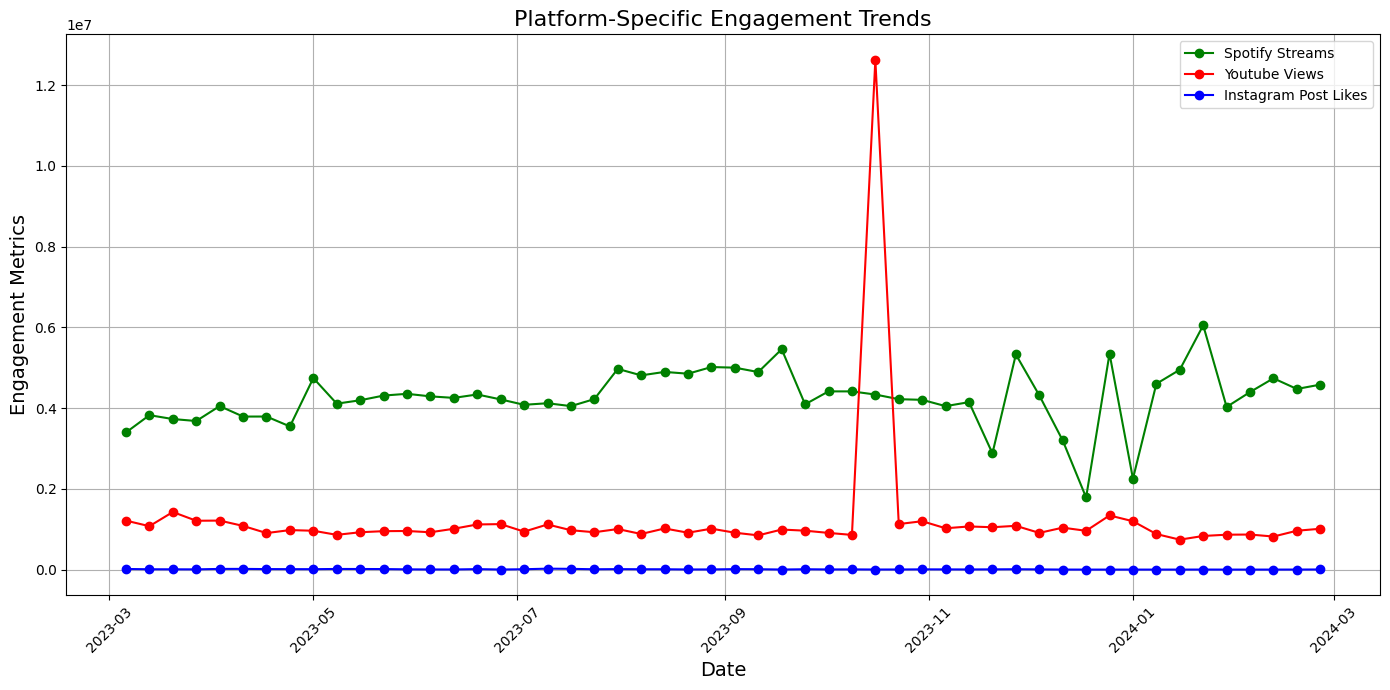

In [20]:
# Selecting a subset of columns for the platforms we're focusing on: Spotify, YouTube, and Instagram
platform_data = engagement_df[['Date', 'Spotify streams', 'Youtube views', 'Instagram post likes']]

# Plotting the platform-specific trends over time
plt.figure(figsize=(14, 7))

# Spotify
plt.plot(platform_data['Date'], platform_data['Spotify streams'], label='Spotify Streams', marker='o', linestyle='-', color='green')

# YouTube
plt.plot(platform_data['Date'], platform_data['Youtube views'], label='Youtube Views', marker='o', linestyle='-', color='red')

# Instagram
plt.plot(platform_data['Date'], platform_data['Instagram post likes'], label='Instagram Post Likes', marker='o', linestyle='-', color='blue')

plt.title('Platform-Specific Engagement Trends', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Engagement Metrics', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The plot illustrates the platform-specific engagement trends for CamelPhat, focusing on Spotify streams, Youtube views, and Instagram post likes. Each line represents the trend in engagement metrics on each platform over time, providing insights into how audience interactions on these platforms have evolved.

In [21]:
# Calculating the correlation between different engagement metrics
engagement_correlation = engagement_df.drop(['Date', 'Total Engagement'], axis=1).corr()

engagement_correlation


,Spotify streams,Youtube views,Instagram post likes,Shazams,Airplay spins,X likes,Soundcloud plays,Tiktok likes
Spotify streams,1.000000,-0.010473,-0.070038,0.172613,-0.224604,-0.234602,0.262850,0.298654
Youtube views,-0.010473,1.000000,-0.110661,-0.041852,0.152141,-0.006096,0.049869,-0.022024
Instagram post likes,-0.070038,-0.110661,1.000000,-0.052217,-0.501664,0.274098,-0.076450,-0.017401
Shazams,0.172613,-0.041852,-0.052217,1.000000,-0.212676,-0.129617,0.190953,0.324570
Airplay spins,-0.224604,0.152141,-0.501664,-0.212676,1.000000,-0.195487,-0.281103,-0.398427
X likes,-0.234602,-0.006096,0.274098,-0.129617,-0.195487,1.000000,-0.438231,-0.164197
Soundcloud plays,0.262850,0.049869,-0.076450,0.190953,-0.281103,-0.438231,1.000000,0.352311
Tiktok likes,0.298654,-0.022024,-0.017401,0.324570,-0.398427,-0.164197,0.352311,1.000000


The correlation analysis between different engagement metrics reveals various relationships:

    Positive Correlations: Some metrics show positive correlations, indicating that increases in one metric tend to coincide with increases in another. For example, Tiktok likes have a positive correlation with Spotify streams, Shazams, and Soundcloud plays, suggesting that activities or popularity on these platforms may be interconnected.

    Negative Correlations: There are also negative correlations, where an increase in one metric corresponds with a decrease in another. Notably, Instagram post likes and Airplay spins show a significant negative correlation, suggesting that as airplay spins increase, Instagram engagement may decrease, and vice versa.

    Weak or No Correlations: Some metrics, like Spotify streams and Youtube views, have very low (near zero) correlations, indicating no strong relationship between these platforms' engagement metrics.

These correlations can provide insights into how engagement across different platforms and activities may influence each other. For instance, a strong positive correlation might suggest complementary platforms where success on one could benefit another.

Let's proceed with the Audience Analysis to understand the demographic breakdown and core audience segments of CamelPhat's fanbase. This analysis can reveal insights into the age, gender, location, and possibly other characteristics of their audience. I'll start by loading and examining the "Audience Map" data to see what specific information it contains.

The "Audience Map" dataset provides a comprehensive overview of CamelPhat's audience demographics and distribution across different platforms and countries. Here's what the dataset includes:

    Country: The countries of the audience.
    Viberate overall audience (%): Percentage of the overall audience located in each country.
    Spotify monthly listeners & Spotify monthly listeners (%): Number and percentage of monthly listeners on Spotify by country.
    Spotify monthly listeners growth: Growth of monthly listeners on Spotify, although it seems this column might not have data.
    Youtube monthly views & Youtube monthly views (%): Number and percentage of monthly views on YouTube by country.
    Youtube monthly views growth: Growth of monthly views on YouTube, which also seems to lack data.
    Youtube subscribers & Youtube subscribers (%): Number and percentage of YouTube subscribers by country.
    Instagram followers & Instagram followers (%): Number and percentage of Instagram followers by country.
    Tiktok followers & Tiktok followers (%): Number and percentage of TikTok followers by country, where data seems missing.

With this data, we can analyze:

    Geographic Distribution: Understand the global distribution of CamelPhat's audience.
    Platform Popularity: Determine which platforms have the most significant reach and engagement within different countries.
    Audience Growth Opportunities: Identify potential markets for expansion based on the current audience distribution and engagement levels.

Let's start with the geographic distribution and platform popularity analysis. We'll visualize the audience distribution by country and compare the platform-specific reach within those locations. 

In [23]:
# Load the Audience Map dataset
audience_map_df = pd.read_csv('CamelPhat-Analytics-Audience-Map.csv')

# Display the first few rows of the dataframe to understand its structure
audience_map_df.head()


,Country,Viberate overall audience (%),Spotify monthly listeners,Spotify monthly listeners (%),Spotify monthly listeners growth,Youtube monthly views,Youtube monthly views (%),Youtube monthly views growth,Youtube subscribers,Youtube subscribers (%),Instagram followers,Instagram followers (%),Tiktok followers,Tiktok followers (%)
0,United Kingdom,13.27%,362120.0,14.78%,NaN,587452.0,7.26%,NaN,13827.0,11.52%,129113.0,38.72%,NaN,NaN
1,United States,9.88%,172745.0,7.05%,NaN,793798.0,9.82%,NaN,12016.0,10.01%,54105.0,16.23%,NaN,NaN
2,Australia,5.98%,386600.0,15.78%,NaN,188925.0,2.34%,NaN,4279.0,3.57%,14275.0,4.28%,NaN,NaN
3,Brazil,5.88%,100187.0,4.09%,NaN,420311.0,5.20%,NaN,9383.0,7.82%,21285.0,6.38%,NaN,NaN
4,Germany,5.26%,235064.0,9.59%,NaN,326254.0,4.03%,NaN,5267.0,4.39%,8284.0,2.48%,NaN,NaN


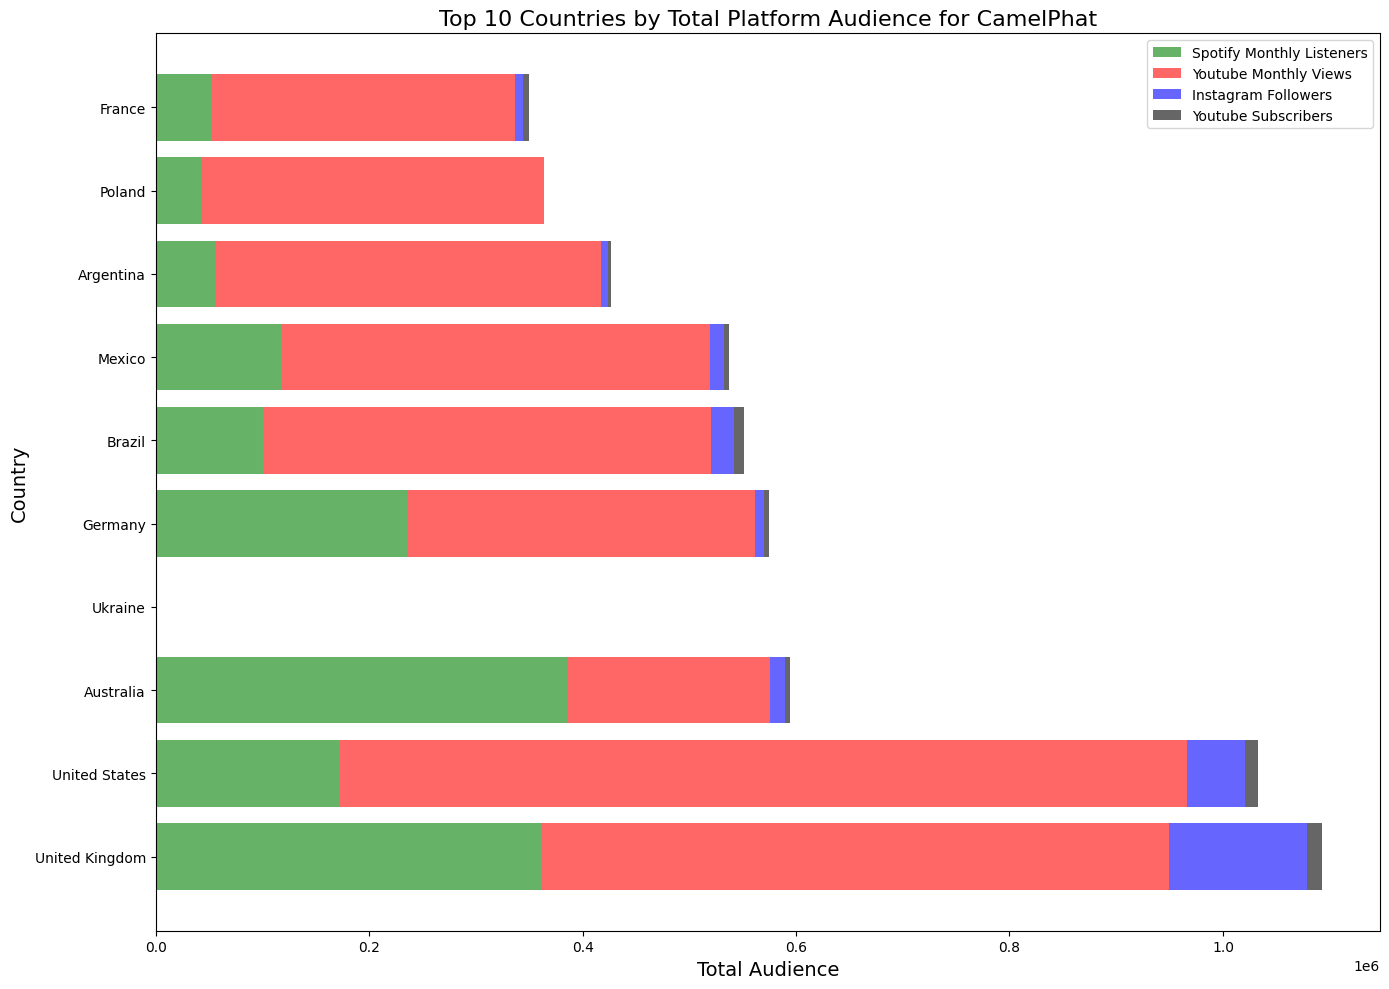

In [24]:
import numpy as np

# Creating a new column for total platform audience by country (excluding columns with growth as they're not populated)
audience_map_df['Total Platform Audience'] = audience_map_df[['Spotify monthly listeners', 'Youtube monthly views', 'Youtube subscribers', 'Instagram followers']].sum(axis=1)

# Top countries by overall audience
top_countries = audience_map_df.sort_values(by='Total Platform Audience', ascending=False).head(10)

# Setting up the figure
plt.figure(figsize=(14, 10))

# Bar positions
bar_positions = np.arange(len(top_countries))

# Plotting
plt.barh(bar_positions, top_countries['Spotify monthly listeners'], label='Spotify Monthly Listeners', color='green', alpha=0.6)
plt.barh(bar_positions, top_countries['Youtube monthly views'], left=top_countries['Spotify monthly listeners'], label='Youtube Monthly Views', color='red', alpha=0.6)
plt.barh(bar_positions, top_countries['Instagram followers'], left=(top_countries['Spotify monthly listeners'] + top_countries['Youtube monthly views']), label='Instagram Followers', color='blue', alpha=0.6)
plt.barh(bar_positions, top_countries['Youtube subscribers'], left=(top_countries['Spotify monthly listeners'] + top_countries['Youtube monthly views'] + top_countries['Instagram followers']), label='Youtube Subscribers', color='black', alpha=0.6)

# Labels and Titles
plt.xlabel('Total Audience', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.yticks(bar_positions, top_countries['Country'])
plt.title('Top 10 Countries by Total Platform Audience for CamelPhat', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()


The bar chart visualizes the top 10 countries by total platform audience for CamelPhat, broken down by Spotify monthly listeners, YouTube monthly views, Instagram followers, and YouTube subscribers. This visualization helps to understand not only which countries have the largest overall audience but also how the audience engages with CamelPhat across different platforms within those countries.

From this analysis, we can observe:

    The distribution of audience across platforms varies by country, indicating differing platform preferences or strengths in different regions.
    Some countries may have a significantly larger audience on a particular platform, highlighting potential areas for targeted engagement or growth strategies.

## Audience Analysis

Continuing with the Audience Analysis, we've looked into the geographic distribution and platform popularity. Another valuable aspect to explore within the audience analysis could be the audience growth opportunities. Identifying potential markets for expansion involves understanding not only where the current audience is concentrated but also where there might be untapped potential based on the data available.



In [26]:
# Revisiting the approach to identify potential geographic growth opportunities based on the engagement rates and audience percentages
# This involves looking for countries with high engagement but comparatively lower overall audience percentages

# We'll calculate a 'Total Engagement Score' by summing relevant engagement metrics for each country
audience_map_df['Total Engagement Score'] = audience_map_df[['Spotify monthly listeners', 'Youtube monthly views', 'Instagram followers']].sum(axis=1)

# Now, let's find countries with high 'Total Engagement Score' but lower 'Viberate overall audience (%)'
# We sort countries based on 'Total Engagement Score' and then by 'Viberate overall audience (%)' to find such countries
potential_growth_countries_sorted = audience_map_df.sort_values(by=['Total Engagement Score', 'Viberate overall audience (%)'], ascending=[False, True])

# Selecting the top 10 countries that might present growth opportunities based on this criteria
top_growth_opportunity_countries = potential_growth_countries_sorted.head(10)[['Country', 'Viberate overall audience (%)', 'Total Engagement Score']]

top_growth_opportunity_countries


,Country,Viberate overall audience (%),Total Engagement Score
0,United Kingdom,13.27%,1078685.0
1,United States,9.88%,1020648.0
2,Australia,5.98%,589800.0
6,Ukraine,3.71%,581798.0
4,Germany,5.26%,569602.0
3,Brazil,5.88%,541783.0
5,Mexico,4.54%,532115.0
10,Argentina,3.21%,423719.0
11,Poland,3.21%,363863.0
8,France,3.46%,343766.0



To further explore audience growth opportunities, we need to assess both the geographic and platform-specific data to identify where CamelPhat's audience could potentially expand. Given the structure of our dataset, we'll focus on identifying:

    Countries with untapped potential - By comparing the percentage of overall audience distribution and engagement rates across different platforms, we can highlight countries where CamelPhat's music and online presence have resonated but might not yet be fully capitalized.

    Platforms with growth potential - Within the identified countries, determining which platforms (Spotify, YouTube, Instagram, etc.) show higher engagement relative to the audience size could guide targeted marketing or content strategies.

Let's start by reassessing the data with these goals in mind, focusing first on geographic growth opportunities. We aim to pinpoint countries where there is significant engagement (e.g., high Spotify streams, YouTube views) relative to the size of the audience. This can suggest markets where a more focused promotional effort could yield substantial growth. Following this, we will explore platform-specific engagement within these identified markets to suggest where efforts could be best directed.

The analysis highlights countries with significant engagement scores relative to their percentage of CamelPhat's overall audience, indicating potential growth opportunities. Notably:

    United Kingdom and United States lead in both overall audience percentage and total engagement score, suggesting they are already strong markets but may still hold further growth potential.
    Australia, Ukraine, and Germany show substantial engagement, indicating potential for deeper market penetration or focused efforts to increase the fanbase.
    Brazil, Mexico, Argentina, Poland, and France are also identified as having high engagement scores relative to their audience percentage, suggesting untapped potential in these markets.

Given this insight, targeted strategies in these countries, considering local preferences and platform usage patterns, could effectively expand CamelPhat's audience.

Next, let's shift focus to platform-specific engagement within these identified markets to uncover where efforts might be best directed for optimal growth. This involves examining the engagement metrics (Spotify monthly listeners, YouTube views, Instagram followers) within the top identified countries to pinpoint platforms with significant engagement but possibly underleveraged in terms of audience size

In [27]:
# For platform-specific engagement analysis, we'll look into the engagement metrics for the identified countries for growth opportunities
# Selecting relevant columns for the platform engagement analysis
platform_engagement_analysis_columns = ['Country', 'Spotify monthly listeners', 'Youtube monthly views', 'Instagram followers']

# Filtering data for the top identified countries for growth opportunities
platform_engagement_analysis_data = audience_map_df.loc[audience_map_df['Country'].isin(top_growth_opportunity_countries['Country']), platform_engagement_analysis_columns]

platform_engagement_analysis_data



,Country,Spotify monthly listeners,Youtube monthly views,Instagram followers
0,United Kingdom,362120.0,587452.0,129113.0
1,United States,172745.0,793798.0,54105.0
2,Australia,386600.0,188925.0,14275.0
3,Brazil,100187.0,420311.0,21285.0
4,Germany,235064.0,326254.0,8284.0
5,Mexico,117008.0,402171.0,12936.0
6,Ukraine,NaN,581798.0,NaN
8,France,52655.0,283719.0,7392.0
10,Argentina,56105.0,361050.0,6564.0
11,Poland,43771.0,320092.0,NaN


The platform-specific engagement data for the identified countries with growth opportunities reveals the following insights:

    United Kingdom: High engagement across Spotify, YouTube, and Instagram, indicating a strong presence on these platforms.
    United States: Similar to the UK, with especially high YouTube views, suggesting video content is particularly effective.
    Australia: High Spotify monthly listeners with lower YouTube views and Instagram followers, indicating potential to increase visibility on YouTube and Instgram.
    Brazil, Germany, Mexico: These countries show balanced engagement across platforms but with room for growth in Instagram engagement.
    Ukraine: High YouTube monthly views but missing data for Spotify and Instagram, suggesting a focused potential on YouTube.
    France, Argentina, Poland: Moderate engagement across Spotify and YouTube but lower Instagram followers, indicating potential for growth on Instagram.

Given these insights, targeted marketing and content strategies on underleveraged platforms in these countries could help in expanding CamelPhat's audience. For instance, increasing Instagram content and engagement in countries like Brazil, Germany, Mexico, France, Argentina, and Poland could be beneficial. Similarly, focusing on YouTube in Ukraine and enhancing Spotify and YouTube visibility in Australia could tap into untapped audience segments.

This analysis suggests strategic focus areas for expanding the audience base in specific markets through tailored platform engagement strategies.